## Deep Learning Concepts:

*   Activation Functions
*   Network Architecture
*   Gradients
*   Loss Evaluation
*   Data Flow & weight distribution



**Activation Function:** Adds non-linearity to neurons, allowing the model to learn complex patterns in data.

**Epoch:** A full cycle through the entire training dataset during the training of a neural network.

**Neuron:** A single unit in a neural network layer that processes input and applies activation.

**Hidden Layer:** Layers between input and output that capture intermediate features and patterns in the data.

**Loss Function:** Measures model prediction error; optimization aims to minimize this value for better accuracy.

**Gradient:** Derivative of the loss with respect to weights, guiding weight adjustments during optimization.

**Backpropagation:** Algorithm for computing gradients, enabling efficient weight updates in neural network training.

**Learning Rate:** A factor that scales the weight updates, controlling training speed and stability.

**Overfitting:** When a model learns training data too well, causing poor performance on unseen data.

**Validation Data:** Separate data used to evaluate model performance during training, helping prevent overfitting.

**Flattening:** Reshapes multi-dimensional data (e.g., images) into a 1D vector, making it suitable for dense layers.

**Dense Layer:** Fully connected layer in a neural network where each neuron connects to every neuron in the previous layer.

**Softmax:** Activation function in output layer for multi-class classification, turning logits into probabilities.

**ReLU (Rectified Linear Unit):** Activation that outputs the input if positive, otherwise zero; combats vanishing gradients.

**Batch Size:** Number of samples processed before model updates weights, balancing speed and memory usage.

In [ ]:
# import pandas as pd

# # Download the wind generation data (example: Germany)
# url = "https://data.open-power-system-data.org/time_series/latest/time_series_60min_singleindex.csv"
# data = pd.read_csv(url)

# # Inspect data
# display(data.head())

**Step 1:** Load and Preprocess the Data

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Preprocess data
X_train = X_train.reshape(-1, 28 * 28).astype("float32") / 255
X_test = X_test.reshape(-1, 28 * 28).astype("float32") / 255

# One-hot encode the labels
y_train = to_categorical(y_train, 20)
y_test = to_categorical(y_test, 20)
print("data loaded")
print(f"X Train shape: {X_train.shape}")
print(f"Y Train shape: {y_train.shape}")
print(f"X Test shape: {X_test.shape}")
print(f"Y Test shape: {y_test.shape}")

data loaded
X Train shape: (60000, 784)
Y Train shape: (60000, 20)
X Test shape: (10000, 784)
Y Test shape: (10000, 20)


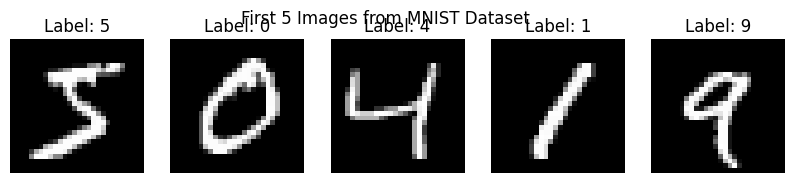

In [ ]:
import matplotlib.pyplot as plt

# Visualize the first 5 images
plt.figure(figsize=(10, 2))
for i in range(5):
    # Reshape each image back to 28x28 pixels for visualization
    image = X_train[i].reshape(28, 28)
    label = y_train[i].argmax()  # Get the original label (0-9)

    plt.subplot(1, 5, i + 1)
    plt.imshow(image, cmap='gray')
    plt.title(f"Label: {label}")
    plt.axis('off')

plt.suptitle("First 5 Images from MNIST Dataset")
plt.show()

**Step 2: Define the MLP Model with Activation Functions:**

MLP with two hidden layers and different activation functions. We’ll use ReLU in hidden layers and softmax in the output layer (for multi-class classification)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(128, input_shape=(28 * 28,), activation='relu'),  # First hidden layer with ReLU
    Dense(64, activation='relu'),                           # Second hidden layer with ReLU
    Dense(10, activation='softmax')                         # Output layer with softmax
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8653 - loss: 0.4617 - val_accuracy: 0.9530 - val_loss: 0.1523
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9650 - loss: 0.1187 - val_accuracy: 0.9654 - val_loss: 0.1096
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9749 - loss: 0.0791 - val_accuracy: 0.9689 - val_loss: 0.1065
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9822 - loss: 0.0570 - val_accuracy: 0.9672 - val_loss: 0.1082
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9869 - loss: 0.0424 - val_accuracy: 0.9725 - val_loss: 0.0994
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9895 - loss: 0.0341 - val_accuracy: 0.9690 - val_loss: 0.1124
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9917 - loss: 0.0257 - val_accuracy: 0.9740 - val_loss: 0.0991
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9926 - loss: 0.0237 - val_accurac

**Step 3: Understand Gradient Checking**

For gradient checking, we’ll use a numerical approximation for the gradients and compare them to the gradients from backpropagation. Gradient checking is computationally expensive, so we’ll only do it on a small subset of the data.

Here’s a conceptual example of gradient checking on a single weight:

Choose a small epsilon (e.g.,
1
0
−
7
10
−7
 ).
Perturb a weight by epsilon in the positive and negative directions.
Calculate the cost with each perturbation.
Compare the numerical gradient to the backpropagation gradient.
In practice, gradient checking is rarely done on large neural networks due to high computational costs, but it’s valuable in smaller examples to verify that gradients are being computed correctly.

In [ ]:
import numpy as np

# Function to calculate numerical gradient
def compute_numerical_gradient(model, X, y, epsilon=1e-7):
    grads = np.zeros(model.trainable_weights[0].shape)
    # Loop over each weight
    for i in range(model.trainable_weights[0].shape[0]):
        # Add epsilon to the weight
        model.trainable_weights[0][i] += epsilon
        loss_plus = model.evaluate(X, y, verbose=0)

        # Subtract epsilon from the weight
        model.trainable_weights[0][i] -= 2 * epsilon
        loss_minus = model.evaluate(X, y, verbose=0)

        # Compute the numerical gradient
        grads[i] = (loss_plus - loss_minus) / (2 * epsilon)

        # Reset the weight to original value
        model.trainable_weights[0][i] += epsilon

    return grads

Step 4: Evaluate and Test the Model
After training, evaluate the MLP on the test data to see how well it performs.

In [ ]:
# Evaluate model performance on test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9749 - loss: 0.1137
Test Accuracy: 0.9771000146865845


Summary of Steps
Preprocess the Data: Flatten the images, normalize pixel values, and one-hot encode labels.
Build an MLP: Define layers with Dense layers, using ReLU for hidden layers and softmax for the output.
Implement Gradient Checking: Check gradients by numerically approximating them on a subset of data.
Evaluate Model: Measure accuracy on the test data to assess model performance.

**1. Visualize the Model Architecture**:
Using plot_model from Keras, we can create a diagram of the model architecture.

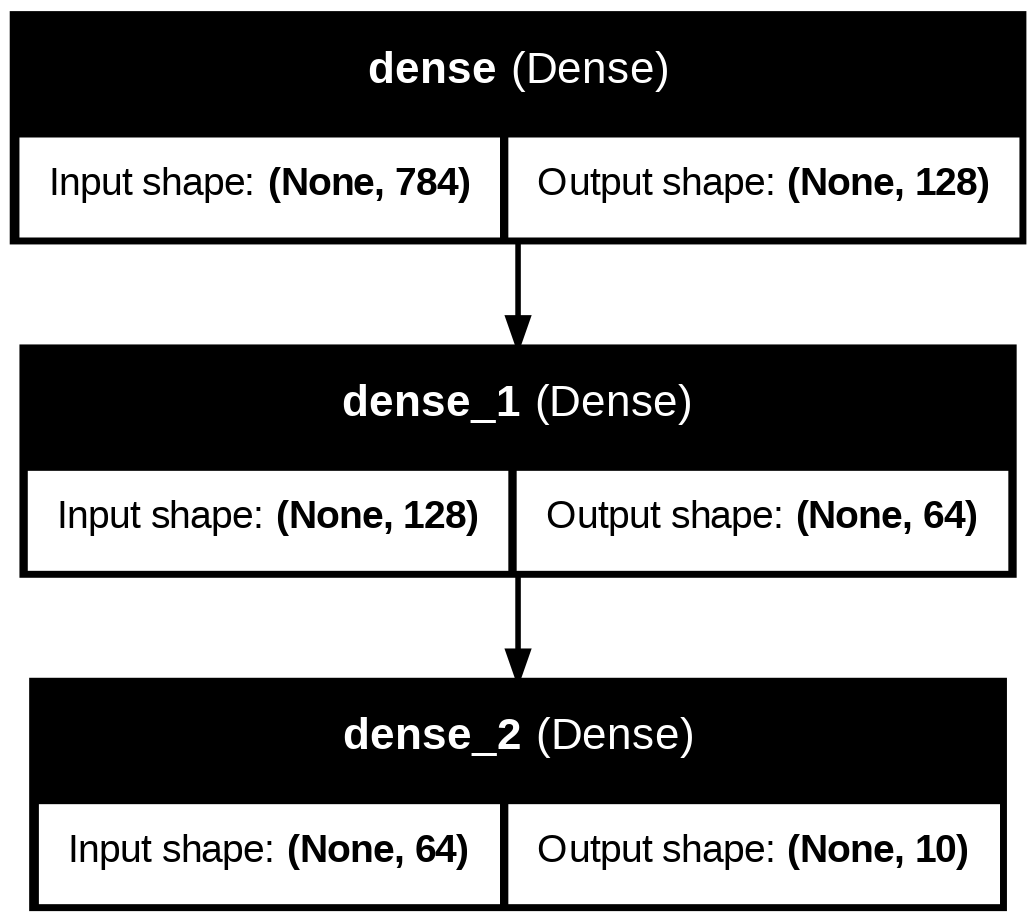

In [ ]:
from tensorflow.keras.utils import plot_model

# Save model architecture as an image file
plot_model(model, to_file='mlp_model_architecture.png', show_shapes=True, show_layer_names=True)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9955 - loss: 0.0151 - val_accuracy: 0.9740 - val_loss: 0.1157
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9954 - loss: 0.0129 - val_accuracy: 0.9737 - val_loss: 0.1203
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9960 - loss: 0.0127 - val_accuracy: 0.9733 - val_loss: 0.1243
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9962 - loss: 0.0112 - val_accuracy: 0.9737 - val_loss: 0.1341
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9954 - loss: 0.0135 - val_accuracy: 0.9740 - val_loss: 0.1477
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9973 - loss: 0.0084 - val_accuracy: 0.9765 - val_loss: 0.1241
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9961 - loss: 0.0109 - val_accuracy: 0.9738 - val_loss: 0.1376
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9974 - loss: 0.0067 - 

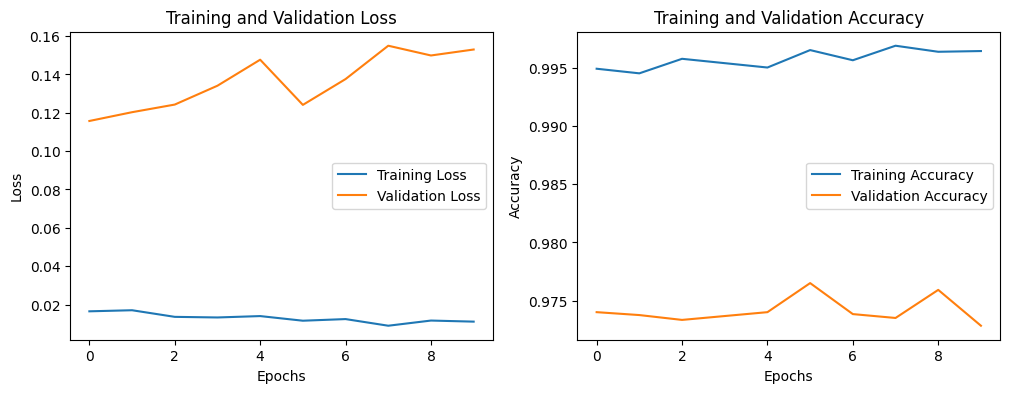

In [ ]:
import matplotlib.pyplot as plt

# Assume `history` is the output from model.fit()
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Plot loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()


**2. Visualize Weight Distributions:** Weight distributions can reveal how weights change during training. This is particularly useful to see if weights are getting too large or too small, which might indicate a problem with initialization or the learning rate.

In [ ]:
# Visualize weight distributions of each layer
for layer in model.layers:
    weights = layer.get_weights()
    if weights:  # Some layers like Dropout have no weights
        plt.hist(weights[0].flatten(), bins=30)
        plt.title(f'Weight Distribution in Layer: {layer.name}')
        plt.xlabel('Weight Values')
        plt.ylabel('Frequency')
        plt.show()

**3. Activations in Hidden Layers:**
To visualize activations, you can create a Keras function that maps inputs to activations for a specific layer. Here, we’ll visualize the activations of the first hidden layer.

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8657 - loss: 0.4555 - val_accuracy: 0.9600 - val_loss: 0.1317
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9657 - loss: 0.1141 - val_accuracy: 0.9698 - val_loss: 0.1027
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9757 - loss: 0.0791 - val_accuracy: 0.9706 - val_loss: 0.1003
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9835 - loss: 0.0552 - val_accuracy: 0.9727 - val_loss: 0.0964
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9866 - loss: 0.0442 - val_accuracy: 0.9750 - val_loss: 0.0901
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9899 - loss: 0.0330 - val_accuracy: 0.9733 - val_loss: 0.0962
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9906 - loss: 0.0276 - val_accuracy: 0.9753 - val_loss: 0.0933
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9919 - loss: 0.0255 - 

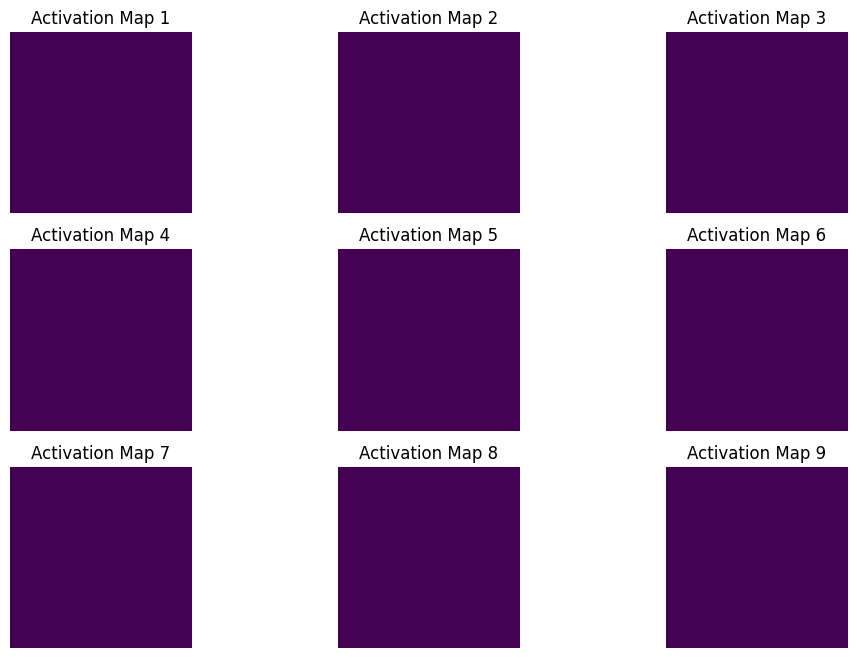

In [ ]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
import numpy as np
import matplotlib.pyplot as plt

# Define the model using the Functional API
inputs = Input(shape=(28 * 28,))
x = Dense(128, activation='relu')(inputs)
x = Dense(64, activation='relu')(x)
outputs = Dense(10, activation='softmax')(x)
model = Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model (or load pre-trained weights if already trained)
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Create a new model that outputs the activations of the first hidden layer
# Here, we use the 'x' variable from the first Dense layer
activation_model = Model(inputs=model.input, outputs=model.layers[1].output)

# Get activations for a sample image
sample_image = np.expand_dims(X_test[0], axis=0)  # Use the first test image
activations = activation_model.predict(sample_image)

# Plot activations for each neuron in the first hidden layer
plt.figure(figsize=(12, 8))
for i in range(1, 10):  # Show first 9 activations
    plt.subplot(3, 3, i)
    plt.imshow(activations[:, i-1].reshape(1, -1), cmap='viridis')
    plt.title(f'Activation Map {i}')
    plt.axis('off')
plt.show()

**Step 4: Predictions on Test Data:**
Lastly, let’s visualize the model's predictions on some test images alongside their true labels. This helps you see if the model’s predictions align with the actual classes.

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


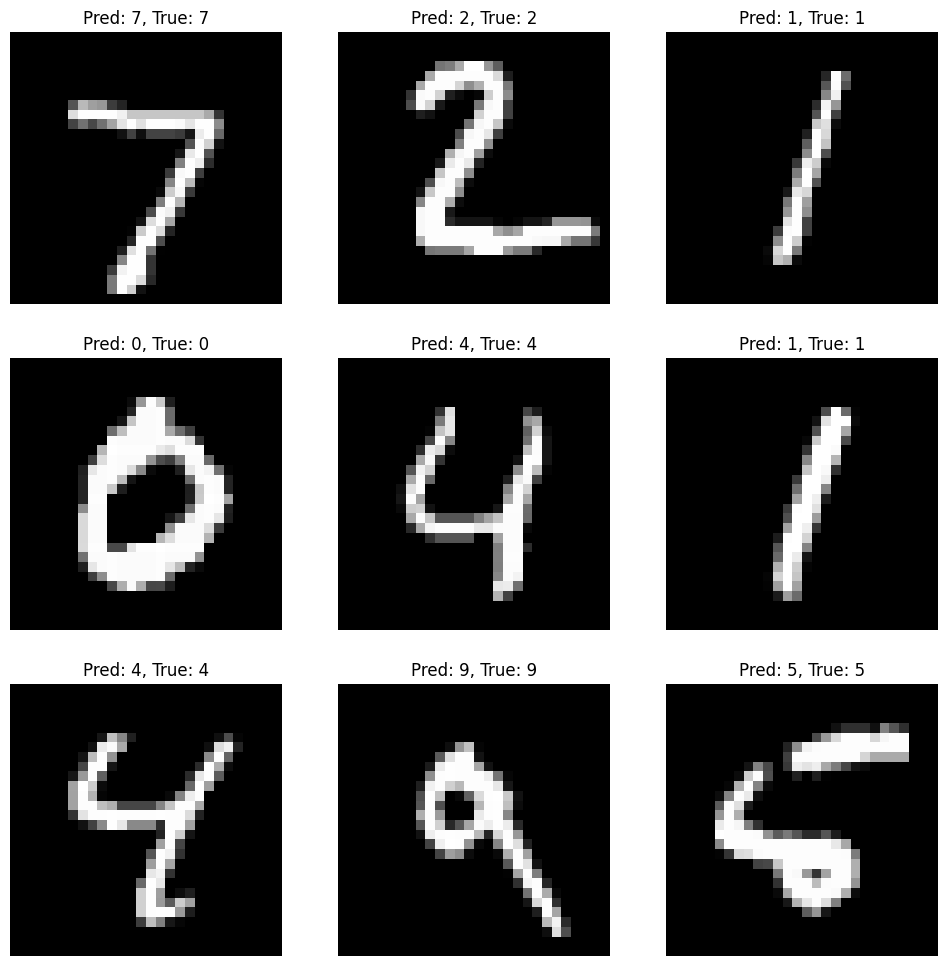

In [ ]:
import numpy as np

# Predict on test data
predictions = model.predict(X_test)
predictions = np.argmax(predictions, axis=1)  # Convert from one-hot to class label
y_test_labels = np.argmax(y_test, axis=1)

# Plot a few test images, their predicted labels, and true labels
plt.figure(figsize=(12, 12))
for i in range(9):  # Show 9 sample predictions
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {predictions[i]}, True: {y_test_labels[i]}")
    plt.axis('off')
plt.show()

**End-to-End Visualization of MLP Training and Inference**



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 328,160 (1.25 MB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 218,774 (854.59 KB)

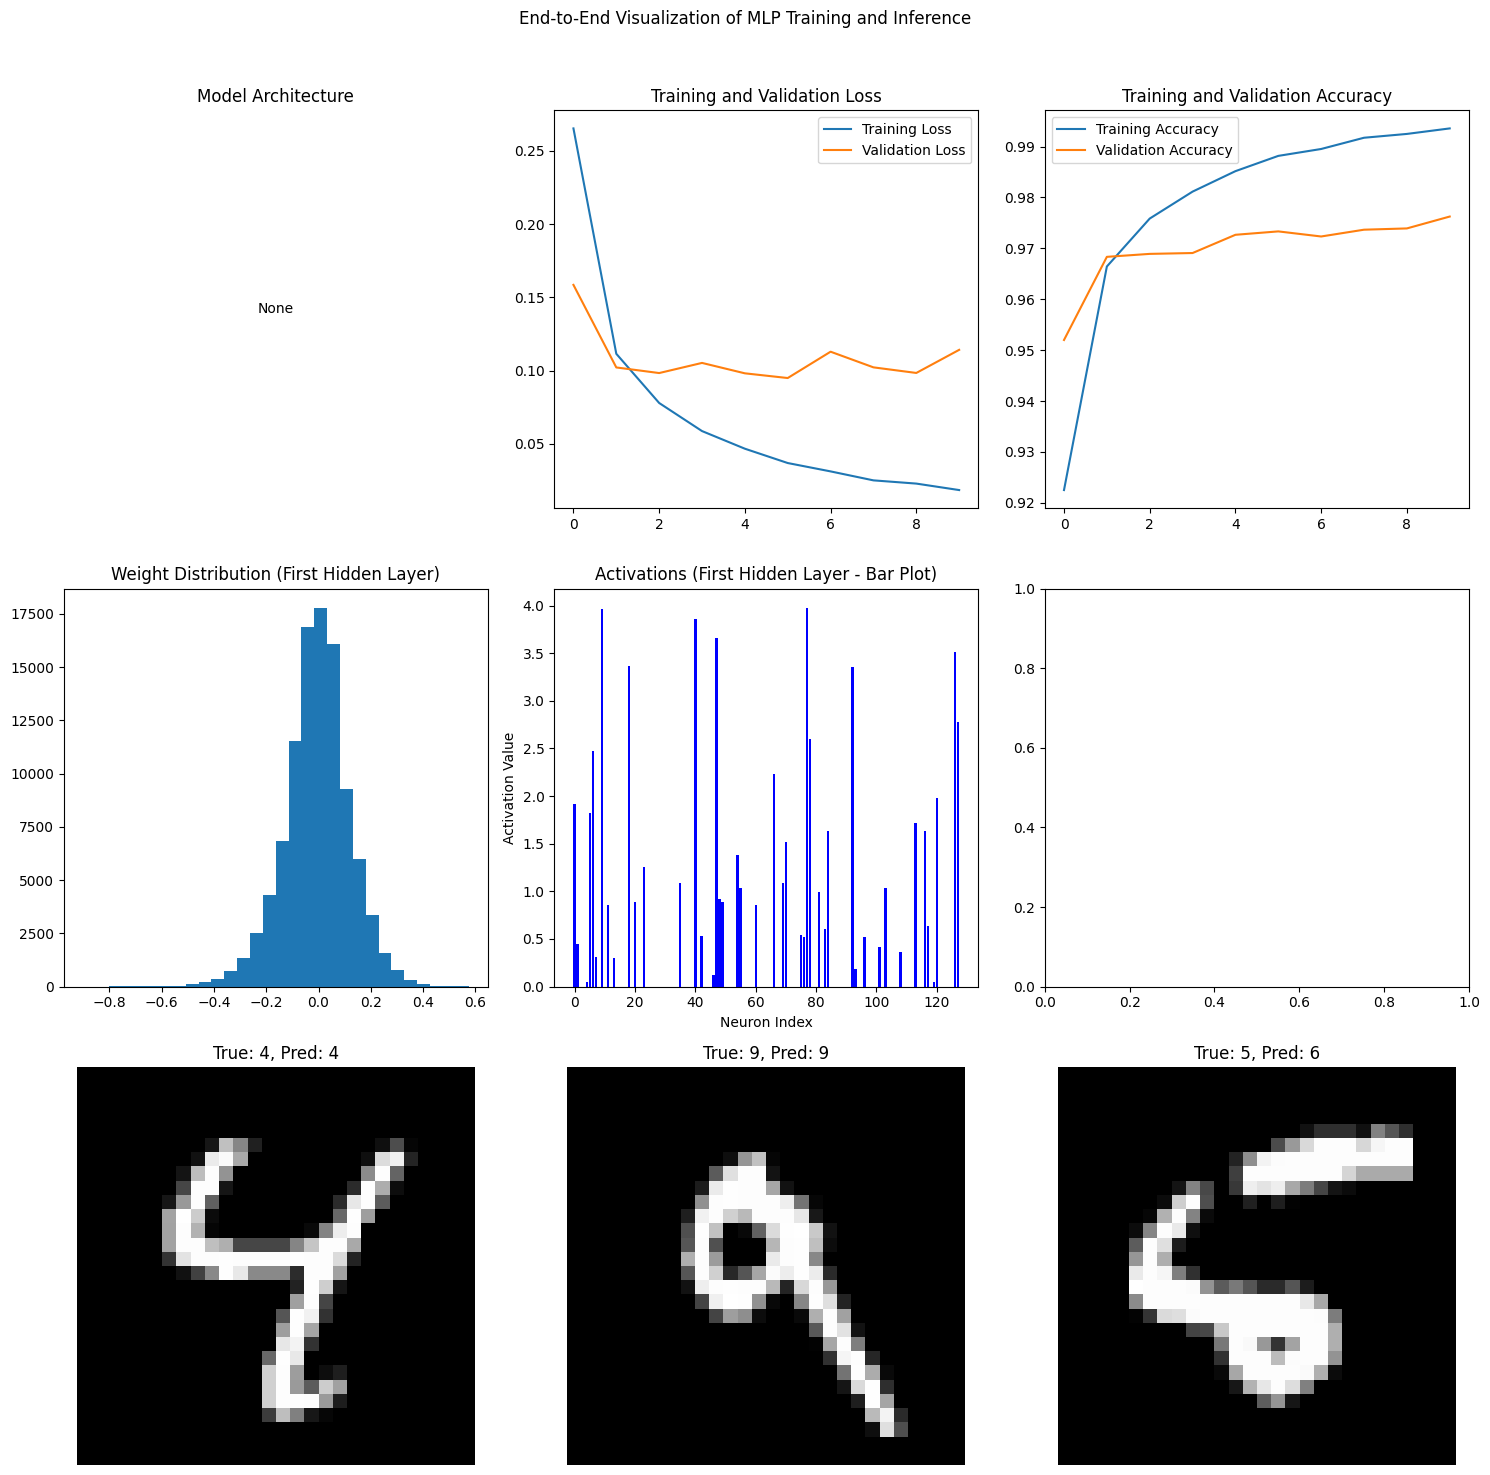

In [ ]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess the data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(-1, 28 * 28).astype("float32") / 255
X_test = X_test.reshape(-1, 28 * 28).astype("float32") / 255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Define the model using the Functional API
inputs = Input(shape=(28 * 28,))
x = Dense(128, activation='relu')(inputs)
x = Dense(64, activation='relu')(x)
outputs = Dense(10, activation='softmax')(x)
model = Model(inputs=inputs, outputs=outputs)

# Compile and train the model, capturing history
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=0)

# Create an activation model to get activations from the first hidden layer
activation_model = Model(inputs=model.input, outputs=model.layers[1].output)

# Get activations for a sample image
sample_image = np.expand_dims(X_test[0], axis=0)
activations = activation_model.predict(sample_image)

# Get model predictions for visualization
predictions = model.predict(X_test[:9])
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test[:9], axis=1)

# Create a single figure for end-to-end visualization
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
fig.suptitle("End-to-End Visualization of MLP Training and Inference")

# Plot model architecture summary
axes[0, 0].text(0.5, 0.5, str(model.summary()), ha='center', va='center', wrap=True)
axes[0, 0].axis('off')
axes[0, 0].set_title("Model Architecture")

# Plot training loss and accuracy
axes[0, 1].plot(history.history['loss'], label='Training Loss')
axes[0, 1].plot(history.history['val_loss'], label='Validation Loss')
axes[0, 1].set_title("Training and Validation Loss")
axes[0, 1].legend()

axes[0, 2].plot(history.history['accuracy'], label='Training Accuracy')
axes[0, 2].plot(history.history['val_accuracy'], label='Validation Accuracy')
axes[0, 2].set_title("Training and Validation Accuracy")
axes[0, 2].legend()

# Plot weight distribution of the first hidden layer
weights = model.layers[1].get_weights()[0].flatten()
axes[1, 0].hist(weights, bins=30)
axes[1, 0].set_title("Weight Distribution (First Hidden Layer)")

# Plot activations of the first hidden layer
# Option 1: Bar plot of activations
axes[1, 1].bar(range(128), activations[0], color='blue')
axes[1, 1].set_title("Activations (First Hidden Layer - Bar Plot)")
axes[1, 1].set_xlabel("Neuron Index")
axes[1, 1].set_ylabel("Activation Value")

# Option 2: Heatmap of activations reshaped to (16, 8)
# Uncomment the next three lines if you prefer this option:
# axes[1, 1].imshow(activations[0].reshape(16, 8), cmap='viridis')
# axes[1, 1].set_title("Activations (First Hidden Layer - Heatmap)")
# axes[1, 1].axis('off')

# Plot sample predictions with true and predicted labels
for i in range(9):
    ax = axes[2, i % 3]
    ax.imshow(X_test[i].reshape(28, 28), cmap='gray')
    ax.set_title(f"True: {true_labels[i]}, Pred: {predicted_labels[i]}")
    ax.axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Explanation of Activation Functions:
Sigmoid: Range [0, 1], used in binary classification.
Tanh: Range [-1, 1], zero-centered.
ReLU: Range [0, ∞), popular for hidden layers.
Leaky ReLU: Range (-∞, ∞), small gradient for negatives.
Softmax: Range [0, 1] for multi-class probabilities.


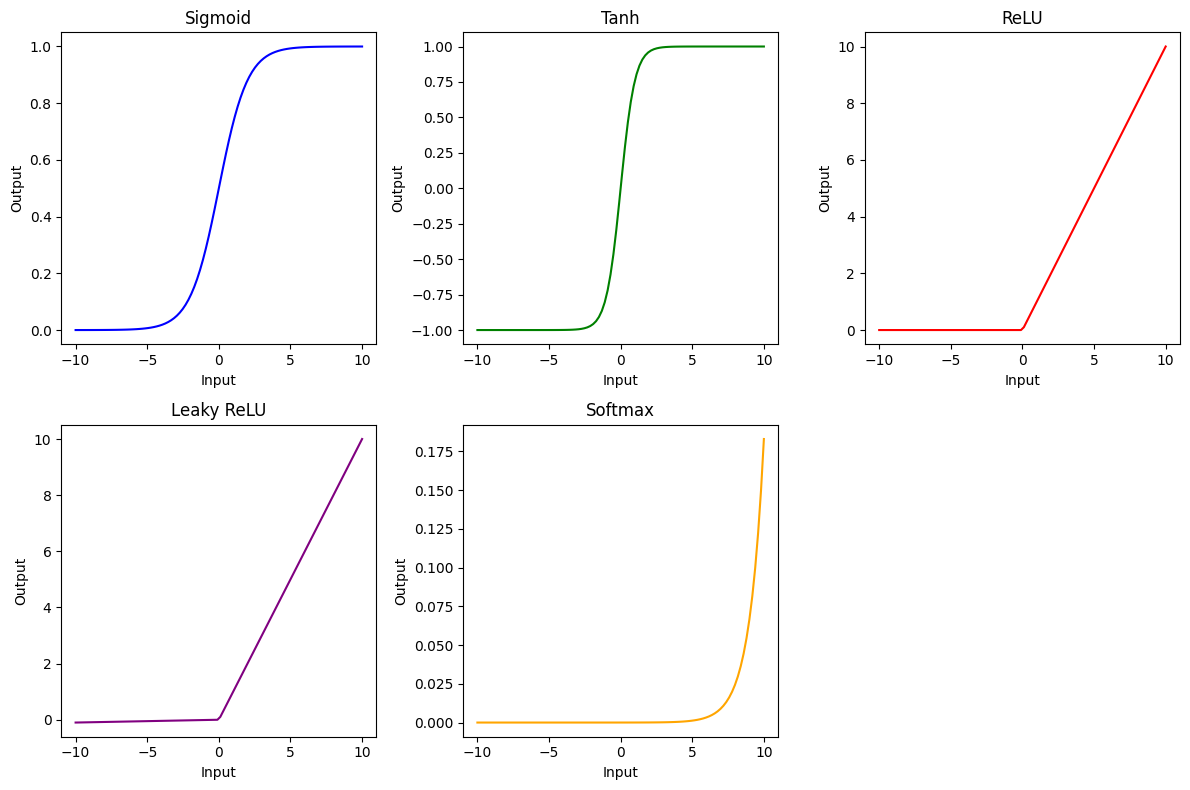

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the range of inputs for visualization
x = np.linspace(-10, 10, 100)

# Define activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(0, x)

def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, x * alpha)

def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0)

# Calculate activations
sigmoid_y = sigmoid(x)
tanh_y = tanh(x)
relu_y = relu(x)
leaky_relu_y = leaky_relu(x)
softmax_y = softmax(x)

# Explanations for each activation function
print("Explanation of Activation Functions:")
print("Sigmoid: Range [0, 1], used in binary classification.")
print("Tanh: Range [-1, 1], zero-centered.")
print("ReLU: Range [0, ∞), popular for hidden layers.")
print("Leaky ReLU: Range (-∞, ∞), small gradient for negatives.")
print("Softmax: Range [0, 1] for multi-class probabilities.")

# Plot activation functions
plt.figure(figsize=(12, 8))

# Sigmoid
plt.subplot(2, 3, 1)
plt.plot(x, sigmoid_y, color="blue")
plt.title("Sigmoid")
plt.xlabel("Input")
plt.ylabel("Output")

# Tanh
plt.subplot(2, 3, 2)
plt.plot(x, tanh_y, color="green")
plt.title("Tanh")
plt.xlabel("Input")
plt.ylabel("Output")

# ReLU
plt.subplot(2, 3, 3)
plt.plot(x, relu_y, color="red")
plt.title("ReLU")
plt.xlabel("Input")
plt.ylabel("Output")

# Leaky ReLU
plt.subplot(2, 3, 4)
plt.plot(x, leaky_relu_y, color="purple")
plt.title("Leaky ReLU")
plt.xlabel("Input")
plt.ylabel("Output")

# Softmax (Softmax applied to the range of inputs)
plt.subplot(2, 3, 5)
plt.plot(x, softmax_y, color="orange")
plt.title("Softmax")
plt.xlabel("Input")
plt.ylabel("Output")

plt.tight_layout()
plt.show()

In [ ]:
# Activation Functions - Theoretical Explanation

# 1. Sigmoid Activation Function
# -------------------------------
# Formula: sigmoid(x) = 1 / (1 + exp(-x))
# Range: [0, 1]
# Description:
# The Sigmoid function transforms input values to a range between 0 and 1.
# It is often used in the output layer for binary classification tasks,
# where outputs represent probabilities. Sigmoid has an "S"-shaped curve,
# squashing large positive values close to 1 and large negative values close to 0.
# Drawback: Sigmoid can lead to vanishing gradients in deep networks.

# 2. Tanh Activation Function
# ---------------------------
# Formula: tanh(x) = (exp(x) - exp(-x)) / (exp(x) + exp(-x))
# Range: [-1, 1]
# Description:
# The Tanh (hyperbolic tangent) function maps input values to a range
# between -1 and 1. Like Sigmoid, it has an "S"-shaped curve but is
# zero-centered, making it more suitable for hidden layers than Sigmoid.
# Tanh is commonly used when negative and positive outputs are required.
# Drawback: Like Sigmoid, it may cause vanishing gradients in deep networks.

# 3. ReLU (Rectified Linear Unit) Activation Function
# ---------------------------------------------------
# Formula: relu(x) = max(0, x)
# Range: [0, ∞)
# Description:
# The ReLU function outputs the input value if positive, otherwise zero.
# It is the most commonly used activation in hidden layers due to its simplicity
# and efficiency. ReLU helps mitigate the vanishing gradient problem.
# Drawback: ReLU can cause "dying ReLU" where neurons get stuck at zero
# for all inputs, particularly in large networks.

# 4. Leaky ReLU Activation Function
# ---------------------------------
# Formula: leaky_relu(x) = x if x > 0, else alpha * x
# Range: (-∞, ∞)
# Description:
# Leaky ReLU is a modified version of ReLU that allows a small, non-zero
# gradient when the input is negative. This ensures that neurons are
# less likely to "die" and stop learning, as they retain a small gradient.
# Leaky ReLU is commonly used with an alpha value (slope) of 0.01.
# Drawback: May be computationally more expensive than standard ReLU.

# 5. Softmax Activation Function
# ------------------------------
# Formula: softmax(x) = exp(x_i) / sum(exp(x_j) for j in range(len(x)))
# Range: [0, 1] (values add up to 1)
# Description:
# The Softmax function converts input values into probabilities that sum to 1.
# It is typically used in the output layer of multi-class classification models,
# making it ideal for cases with mutually exclusive classes. Softmax emphasizes
# the largest values, highlighting the model’s confidence in its predictions.
# Drawback: May be sensitive to large input values, so it can cause numerical instability.

# End of Theoretical Explanation


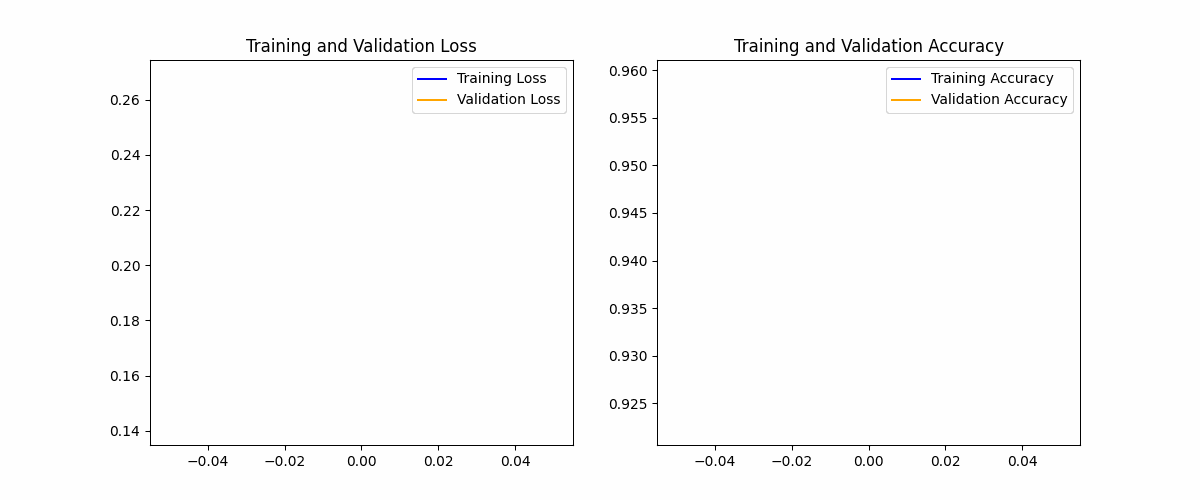

In [ ]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
import plotly.graph_objects as go
import plotly.express as px

# Load and preprocess the data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(-1, 28 * 28).astype("float32") / 255
X_test = X_test.reshape(-1, 28 * 28).astype("float32") / 255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Define the model using the Functional API
inputs = Input(shape=(28 * 28,))
x = Dense(128, activation='relu')(inputs)
x = Dense(64, activation='relu')(x)
outputs = Dense(10, activation='softmax')(x)
model = Model(inputs=inputs, outputs=outputs)

# Compile and train the model, capturing history
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=0)

# Function to update the plot for GIF
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

def update(epoch):
    ax[0].cla()
    ax[1].cla()

    ax[0].plot(history.history['loss'][:epoch+1], label='Training Loss', color='blue')
    ax[0].plot(history.history['val_loss'][:epoch+1], label='Validation Loss', color='orange')
    ax[0].legend()
    ax[0].set_title('Training and Validation Loss')

    ax[1].plot(history.history['accuracy'][:epoch+1], label='Training Accuracy', color='blue')
    ax[1].plot(history.history['val_accuracy'][:epoch+1], label='Validation Accuracy', color='orange')
    ax[1].legend()
    ax[1].set_title('Training and Validation Accuracy')

# Create GIF using FuncAnimation
anim = FuncAnimation(fig, update, frames=len(history.history['loss']), repeat=False)
anim.save("training_animation.gif", writer=PillowWriter(fps=2))

plt.close()

# Display GIF in the notebook
from IPython.display import Image, display
display(Image(filename="training_animation.gif"))

# Interactive Plotly Graphs
# Interactive plot for loss
fig_loss = go.Figure()
fig_loss.add_trace(go.Scatter(x=list(range(1, 11)), y=history.history['loss'], mode='lines+markers', name='Training Loss'))
fig_loss.add_trace(go.Scatter(x=list(range(1, 11)), y=history.history['val_loss'], mode='lines+markers', name='Validation Loss'))
fig_loss.update_layout(title='Training and Validation Loss', xaxis_title='Epoch', yaxis_title='Loss')
fig_loss.show()

# Interactive plot for accuracy
fig_accuracy = go.Figure()
fig_accuracy.add_trace(go.Scatter(x=list(range(1, 11)), y=history.history['accuracy'], mode='lines+markers', name='Training Accuracy'))
fig_accuracy.add_trace(go.Scatter(x=list(range(1, 11)), y=history.history['val_accuracy'], mode='lines+markers', name='Validation Accuracy'))
fig_accuracy.update_layout(title='Training and Validation Accuracy', xaxis_title='Epoch', yaxis_title='Accuracy')
fig_accuracy.show()

In [ ]:
Def:

In [ ]:
!pip install pandas_ta
!pip install talib
!pip install yfinance
!pip install ace_tools

**10 Recent Developments in Deep Learning Field:**

**Transformers in NLP (BERT, GPT-3):** Revolutionized language models, enabling deeper context understanding in language processing tasks.

**Generative Adversarial Networks (StyleGAN, BigGAN):** Enabled realistic synthetic media generation, with applications in art, gaming, and data augmentation.

**Explainable AI (LIME, SHAP):** Tools that enhance model interpretability, making deep learning decisions transparent and trustworthy.

**Federated Learning (TensorFlow Federated):** Decentralized training across devices without sharing data, improving privacy and data security.

**Neurosymbolic AI (DeepMind’s AlphaFold):** Combines neural networks with symbolic reasoning, achieving breakthroughs in protein folding and logical AI.

**Vision Transformers (ViT, DINO):** Applied Transformer architecture to vision tasks, achieving state-of-the-art results in image classification.

**Self-Supervised Learning (SimCLR, BYOL):** Learns from unlabeled data, reducing annotation needs and unlocking performance in data-scarce domains.

**Deep Reinforcement Learning (AlphaStar, MuZero):** Models that excel in complex decision-making tasks, like robotics and advanced gaming strategies.

**Diffusion Models (DALL-E 2, Latent Diffusion):** Generative models creating highly detailed images, challenging GANs for visual fidelity and versatility.

**Hyperparameter Optimization (Optuna, AutoML):** Automates the search for optimal parameters, streamlining training for higher model performance and efficiency.

**A bit about history:**

**1940s - 1950s: Early Neural Network Foundations**
1943: McCulloch & Pitts Model

**Invented by Warren McCulloch & Walter Pitts (USA)**
Proposed a model of artificial neurons, foundational for neural networks.
1949: Hebbian Learning

**Developed by Donald Hebb (Canada)**
Introduced a learning rule where neuron connections strengthen when they activate together.
1950s - 1960s: Development of Basic Neural Models
1958: Perceptron

**Created by Frank Rosenblatt (USA) at Cornell**
Simple neural network model for binary classification.
1960: ADALINE Model and Learning Rate

**Invented by Bernard Widrow & Ted Hoff (USA)**
Introduced learning rate and ADALINE (adaptive linear neuron) model using weight updates.
1980s: Multi-Layer Networks and Backpropagation
1986: Backpropagation

**Reintroduced by Geoffrey Hinton, David Rumelhart, & Ronald Williams (Canada)**
Enabled efficient training of multi-layer perceptrons (MLPs).
1985-1986: Sigmoid and Tanh Activation Functions

**Popularized as key activations, allowing the training of deeper layers.**
1990s: Specialized Networks and Recurrent Models
1990s: Gradient Descent and Stochastic Gradient Descent (SGD)

SGD established as standard for faster and efficient neural network training.
1995: Long Short-Term Memory (LSTM)

**Developed by Sepp Hochreiter & Jürgen Schmidhuber (Germany)**
Solved vanishing gradient problem for sequence data in recurrent networks.
2000s: Deeper Architectures and New Training Techniques
2006: Deep Belief Networks

**Introduced by Geoffrey Hinton (Canada)**
Layer-by-layer pre-training for deep architectures, enabling more layers.
2009: Rectified Linear Unit (ReLU)

**Proposed by Yann LeCun (France) and popularized by Hinton’s group**
Provided faster training by addressing the vanishing gradient problem.
2010s: Modern Deep Learning Breakthroughs
2012: AlexNet

**Developed by Alex Krizhevsky, Geoffrey Hinton, & Ilya Sutskever (Canada)**
Won ImageNet challenge using a deep CNN, marking the deep learning revolution.
2014: Generative Adversarial Networks (GANs)

**Created by Ian Goodfellow (USA):**
Allowed networks to generate realistic data by training two competing networks.
2014: Adam Optimizer

**Developed by Diederik Kingma (Netherlands) & Jimmy Ba (Canada)**
An adaptive optimizer for faster, more stable training.
2015: ResNet (Residual Networks)

**Invented by Kaiming He & team (China)**
Introduced skip connections, addressing issues in very deep networks.
Late 2010s - Present: Scalable and Specialized Architectures
2017: Transformer Architecture

**Proposed by Vaswani et al. (Google, USA)**
Revolutionized NLP by removing the need for recurrence in sequence models.
2018: BERT (Bidirectional Encoder Representations from Transformers)

**Created by Devlin et al. (USA)**
Large pre-trained transformer model that boosted NLP task performance.
2020: GPT-3 and Large Language Models

**Released by OpenAI (USA)**
Demonstrated unprecedented performance in NLP with minimal fine-tuning.
Ongoing 2020s: Trends in Explainability and Efficiency
Focus: Making deep learning models interpretable, energy-efficient, and scalable.
Key Players: Contributions from global researchers and institutions.

In [ ]:
# Example setup for BayesNet and Variable for the test to work correctly
import numpy as np
from utils import sample_categorical

class Variable:
    def __init__(self, id, probabilities, parents=None):
        self.id = id
        self.parents = parents if parents else []
        self.prob = probabilities  # Store probability dictionary

class BayesNet:
    def __init__(self, *variables):
        self.nodes = {var.id: var for var in variables}

    def __iter__(self):
        return iter(self.nodes.values())  # Simple iterator over the nodes

# Now, define the sample_forward function without modification
def sample_forward(bayes_net: BayesNet, sample_size: int) -> np.ndarray:
    '''
    Samples from the full joint distribution.
    :param bayes_net: A Bayesian network of type BayesNet.
    :param sample_size: The number of samples to draw from the Bayesian network.
    :returns: A NumPy array of type np.int64 with shape (sample_size, len(bayes_net))
              containing samples from the Bayesian network
    '''

    # Array to hold the samples
    samples = np.empty((sample_size, len(bayes_net.nodes)), np.int64)

    # Loop over each sample
    for s in range(sample_size):
        # Dictionary to store sampled values for each variable
        sample_event = {}

        # Iterate over each variable in the Bayesian network in topological order
        for variable in bayes_net:
            # Get parent values for the current variable
            parent_values = tuple(sample_event[parent_id] for parent_id in variable.parents)

            # Access probability distribution directly from `variable.prob`
            prob_distribution = variable.prob.get(parent_values, np.array([0.5, 0.5]))  # Fallback to [0.5, 0.5] for test

            # Sample a value using the probability distribution
            sampled_value = sample_categorical(prob_distribution)

            # Store sampled value
            sample_event[variable.id] = sampled_value
            samples[s, variable.id] = sampled_value

    return samples

# Updated Sanity Check
# Create a variable with id 0 and probability distribution with no parents
variable_A = Variable(0, {(): np.array([0.5, 0.5])})

# Initialize Bayesian network with a single variable
bayes_net = BayesNet(variable_A)

# Generate samples
samples = sample_forward(bayes_net, 3)

# Assertions to validate output
assert type(samples) == np.ndarray, f'\nWrong output type!\nExpected: np.ndarray\nGiven:\t  {type(samples)}'
assert samples.shape == (3, 1), f'\nWrong output shape!\nExpected: (3, 1)\nGiven:\t  {samples.shape}'
assert samples.dtype == np.int64, f'\nWrong numpy array data type!\nExpected: np.int64\nGiven:\t  {samples.dtype}'
print("Sanity checks passed.")
print("Generated samples:\n", samples)


ImportError: cannot import name 'sample_categorical' from 'utils' (/usr/local/lib/python3.10/dist-packages/utils/__init__.py)

In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the digits dataset
digits = load_digits()
X = digits.data  # feature data (64 features from an 8x8 image)
y = digits.target  # target labels (0-9)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the MLP classifier
mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=300, random_state=42)

# Train the model
mlp.fit(X_train, y_train)

# Make predictions
y_pred = mlp.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))


Accuracy: 0.97
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        53
           1       0.96      0.96      0.96        50
           2       0.96      0.98      0.97        47
           3       1.00      0.94      0.97        54
           4       0.98      1.00      0.99        60
           5       0.97      0.97      0.97        66
           6       0.96      0.98      0.97        53
           7       1.00      0.96      0.98        55
           8       0.87      0.95      0.91        43
           9       0.97      0.95      0.96        59

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540



In [2]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the digits dataset
digits = load_digits()
X = digits.data  # Features (64-dimensional vectors)
y = digits.target  # Labels (digits 0-9)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define different activation functions to test
activation_functions = ['identity', 'logistic', 'tanh', 'relu']

# Dictionary to store results
results = {}

for activation in activation_functions:
    # Initialize the MLPClassifier with the activation function
    mlp = MLPClassifier(hidden_layer_sizes=(50,),
                        activation=activation,
                        max_iter=300,
                        random_state=42)

    # Train the model
    mlp.fit(X_train, y_train)

    # Make predictions
    y_pred = mlp.predict(X_test)

    # Evaluate performance
    accuracy = accuracy_score(y_test, y_pred)
    results[activation] = accuracy
    print(f"Activation Function: {activation}")
    print(f"Accuracy: {accuracy:.4f}\n")

# Summarize results
print("Summary of Activation Function Performance:")
for activation, accuracy in results.items():
    print(f"{activation}: {accuracy:.4f}")

Activation Function: identity
Accuracy: 0.9667

Activation Function: logistic
Accuracy: 0.9815

Activation Function: tanh
Accuracy: 0.9704

Activation Function: relu
Accuracy: 0.9685

Summary of Activation Function Performance:
identity: 0.9667
logistic: 0.9815
tanh: 0.9704
relu: 0.9685


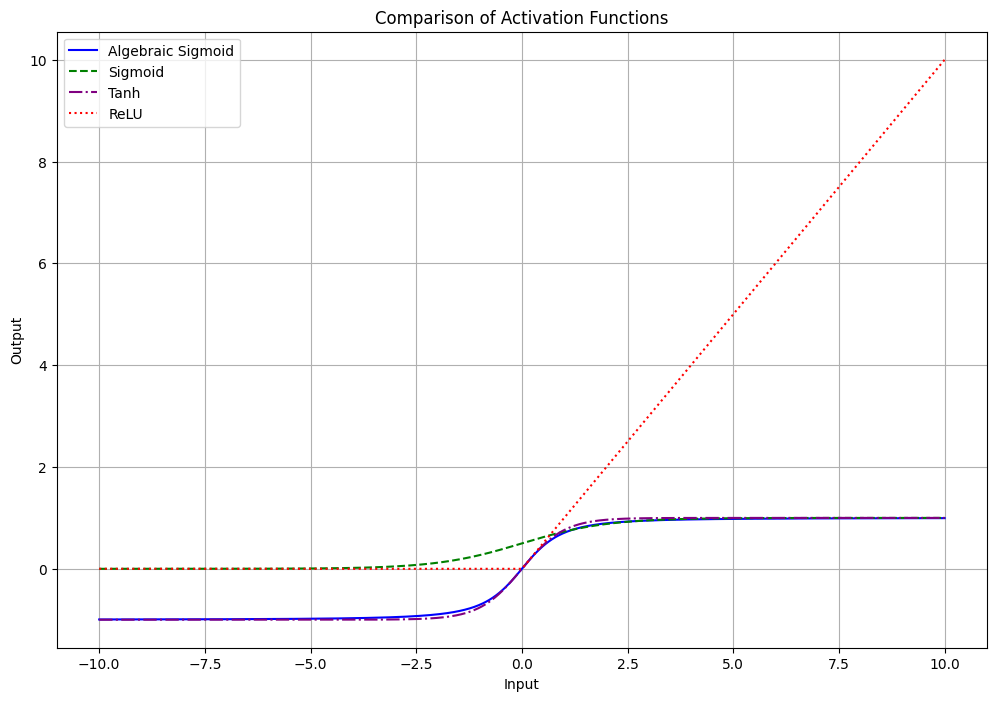

In [4]:
import numpy as np
import matplotlib.pyplot as plt

class Module:
    """Base class for module."""
    def compute_outputs(self, *args, **kwargs):
        raise NotImplementedError

    def compute_grads(self, *args, **kwargs):
        raise NotImplementedError

class AlgebraicSigmoid(Module):
    """ NumPy implementation of an algebraic sigmoid function. """

    def compute_outputs(self, s):
        a = s / np.sqrt(1 + s**2)
        cache = s
        return a, cache

    def compute_grads(self, grads, cache):
        ds = grads * (1 / (1 + cache**2)**(3/2))
        return ds

# Define other activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(0, x)

# Generate a range of inputs
s = np.linspace(-10, 10, 1000)

# Instantiate the AlgebraicSigmoid and compute outputs
algebraic_sigmoid = AlgebraicSigmoid()
algebraic_outputs, _ = algebraic_sigmoid.compute_outputs(s)

# Compute outputs for other activation functions
sigmoid_outputs = sigmoid(s)
tanh_outputs = tanh(s)
relu_outputs = relu(s)

# Plot all activation functions
plt.figure(figsize=(12, 8))
plt.plot(s, algebraic_outputs, label='Algebraic Sigmoid', color='blue')
plt.plot(s, sigmoid_outputs, label='Sigmoid', color='green', linestyle='--')
plt.plot(s, tanh_outputs, label='Tanh', color='purple', linestyle='-.')
plt.plot(s, relu_outputs, label='ReLU', color='red', linestyle=':')

# Customize the plot
plt.title('Comparison of Activation Functions')
plt.xlabel('Input')
plt.ylabel('Output')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
pip install utils

  Preparing metadata (setup.py) ... done
  Created wheel for utils: filename=utils-1.0.2-py2.py3-none-any.whl size=13906 sha256=b43f0ab2e0e1c9e53158c095c4b84ca91a63bf319c2ca99495323333cb6da371
  Stored in directory: /root/.cache/pip/wheels/b8/39/f5/9d0ca31dba85773ececf0a7f5469f18810e1c8a8ed9da28ca7
Successfully built utils


Reference: OpenAI (for content review and fact checks)